In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0-rc0


In [4]:
import os
from datetime import datetime
import pathlib
import numpy as np
import csv

In [5]:
import matplotlib.pyplot as plt

In [7]:
from models.architectures.final_model import getModel

In [8]:
BASE_RESULT_DIR = os.getcwd()
IMG_WIDTH =64
IMG_HEIGHT = 64
AUTOTUNE = tf.data.experimental.AUTOTUNE
TOTAL_SAMPLE = 102794
BATCH_SIZE = 512
EPOCHS=20
TEST_SIZE = int((0.5 * TOTAL_SAMPLE)/BATCH_SIZE)
DATE_TIME = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")
CSV_PATH = os.path.join(BASE_RESULT_DIR , "results" , "train_" + DATE_TIME + ".csv")
CSV_PATH_TEST = ""

file1 = open("test_path.txt","r") 
CSV_PATH_TEST = file1.readlines()[0]
file1.close() 

In [5]:
model = getModel()
model.load_weights("two_class_attention_gaf.h5")

In [9]:
attention_weights = model.layers[1].get_weights()

In [9]:
def decode_img(img):
  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [16]:
img = decode_img("./data/two_class/N/114_979_72.0_0.png")

In [20]:
attended_weights = tf.nn.softmax(tf.nn.relu(tf.multiply(attention_weights, img)))
attended_input = tf.multiply(attended_weights,img)

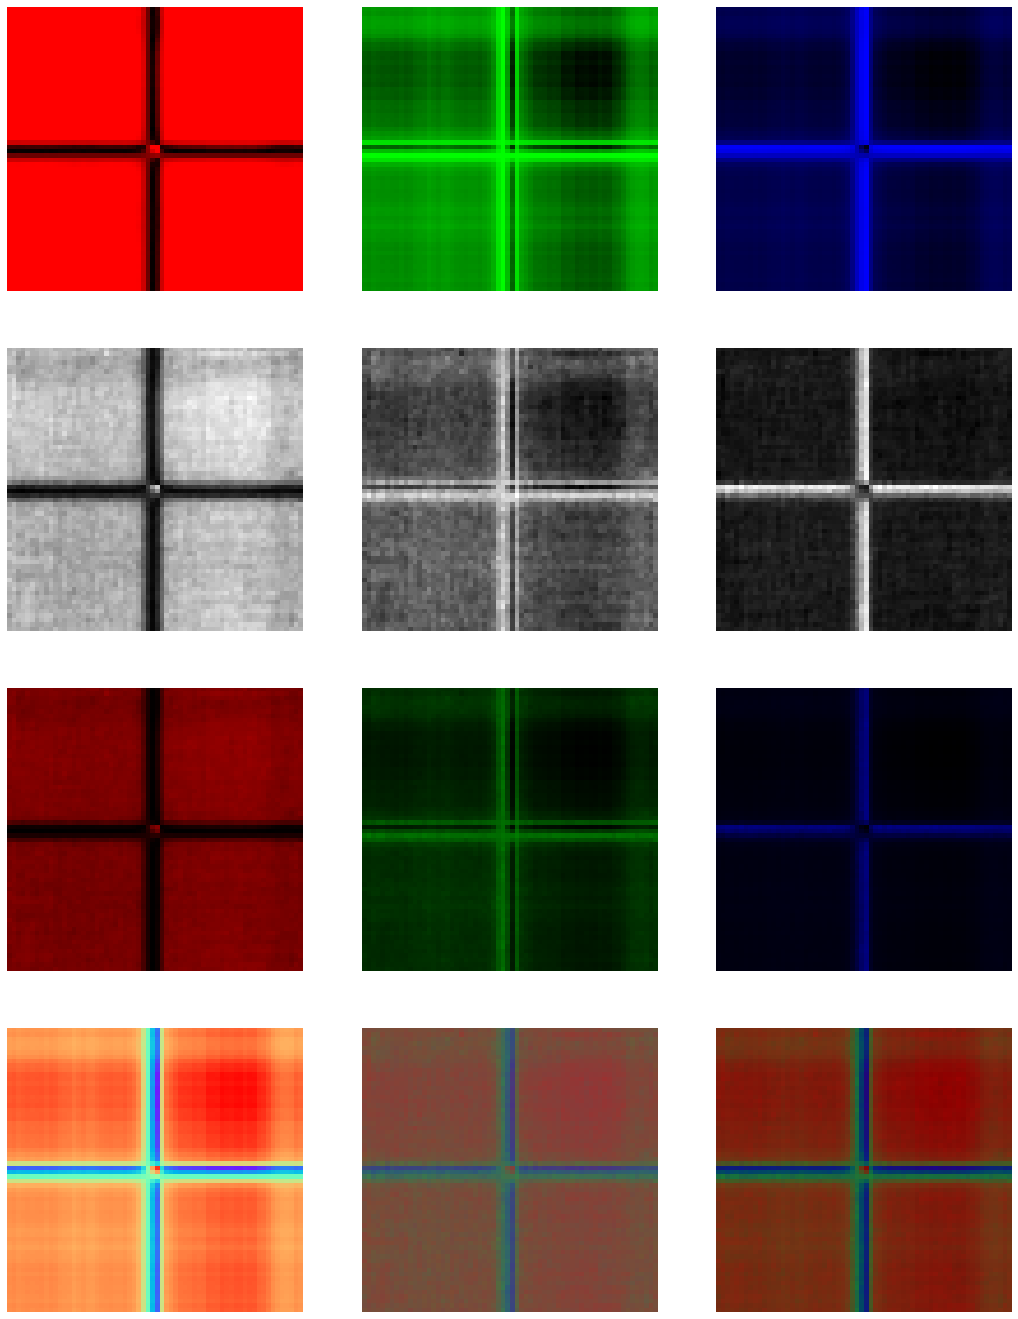

In [87]:
fig, ax = plt.subplots(ncols=3, nrows = 4, figsize=(18,24))
np.vectorize(lambda ax:ax.axis('off'))(ax)

imgr = img.numpy().reshape(64,64,3)[:,:,0]
imgr_ = np.zeros((64,64,3))
imgr_[:,:,0] = imgr
imgg = img.numpy().reshape(64,64,3)[:,:,1]
imgg_ = np.zeros((64,64,3))
imgg_[:,:,1] = imgg
imgb = img.numpy().reshape(64,64,3)[:,:,2]
imgb_ = np.zeros((64,64,3))
imgb_[:,:,2] = imgb

ax[0][0].imshow(imgr_, aspect='auto')
ax[0][1].imshow(imgg_, aspect='auto')
ax[0][2].imshow(imgb_, aspect='auto')

imgr = attended_weights.numpy().reshape(64,64,3)[:,:,0]
imgg = attended_weights.numpy().reshape(64,64,3)[:,:,1]
imgb = attended_weights.numpy().reshape(64,64,3)[:,:,2]

ax[1][0].imshow(imgr,aspect='auto', cmap=plt.get_cmap('gray'))
ax[1][1].imshow(imgg,aspect='auto', cmap=plt.get_cmap('gray'))
ax[1][2].imshow(imgb,aspect='auto', cmap=plt.get_cmap('gray'))


imgr = attended_input.numpy().reshape(64,64,3)[:,:,0]
imgr_ = np.zeros((64,64,3))
imgr_[:,:,0] = imgr
imgg = attended_input.numpy().reshape(64,64,3)[:,:,1]
imgg_ = np.zeros((64,64,3))
imgg_[:,:,1] = imgg
imgb = attended_input.numpy().reshape(64,64,3)[:,:,2]
imgb_ = np.zeros((64,64,3))
imgb_[:,:,2] = imgb

ax[2][0].imshow(imgr_,aspect='auto')
ax[2][1].imshow(imgg_,aspect='auto')
ax[2][2].imshow(imgb_,aspect='auto')

ax[3][0].imshow(img.numpy().reshape(64,64,3),aspect='auto')
ax[3][1].imshow(attended_weights.numpy().reshape(64,64,3), aspect='auto')
ax[3][2].imshow(attended_input.numpy().reshape(64,64,3), aspect='auto')

plt.show()

## first row: IMAGE 
## second row: weights
## third row: weightXimage
## fourth row column1: img, column2: weights, weightXimg

# Image data 

In [18]:
model = getModel()
model.load_weights("two_class_attention_img.h5")
attention_weights = model.layers[1].get_weights()
img = decode_img("./data/two_class_img/N/112_87_54.0_1.png")
attended_weights = tf.nn.softmax(tf.nn.relu(tf.multiply(attention_weights, img)))
attended_input = tf.multiply(attended_weights,img)

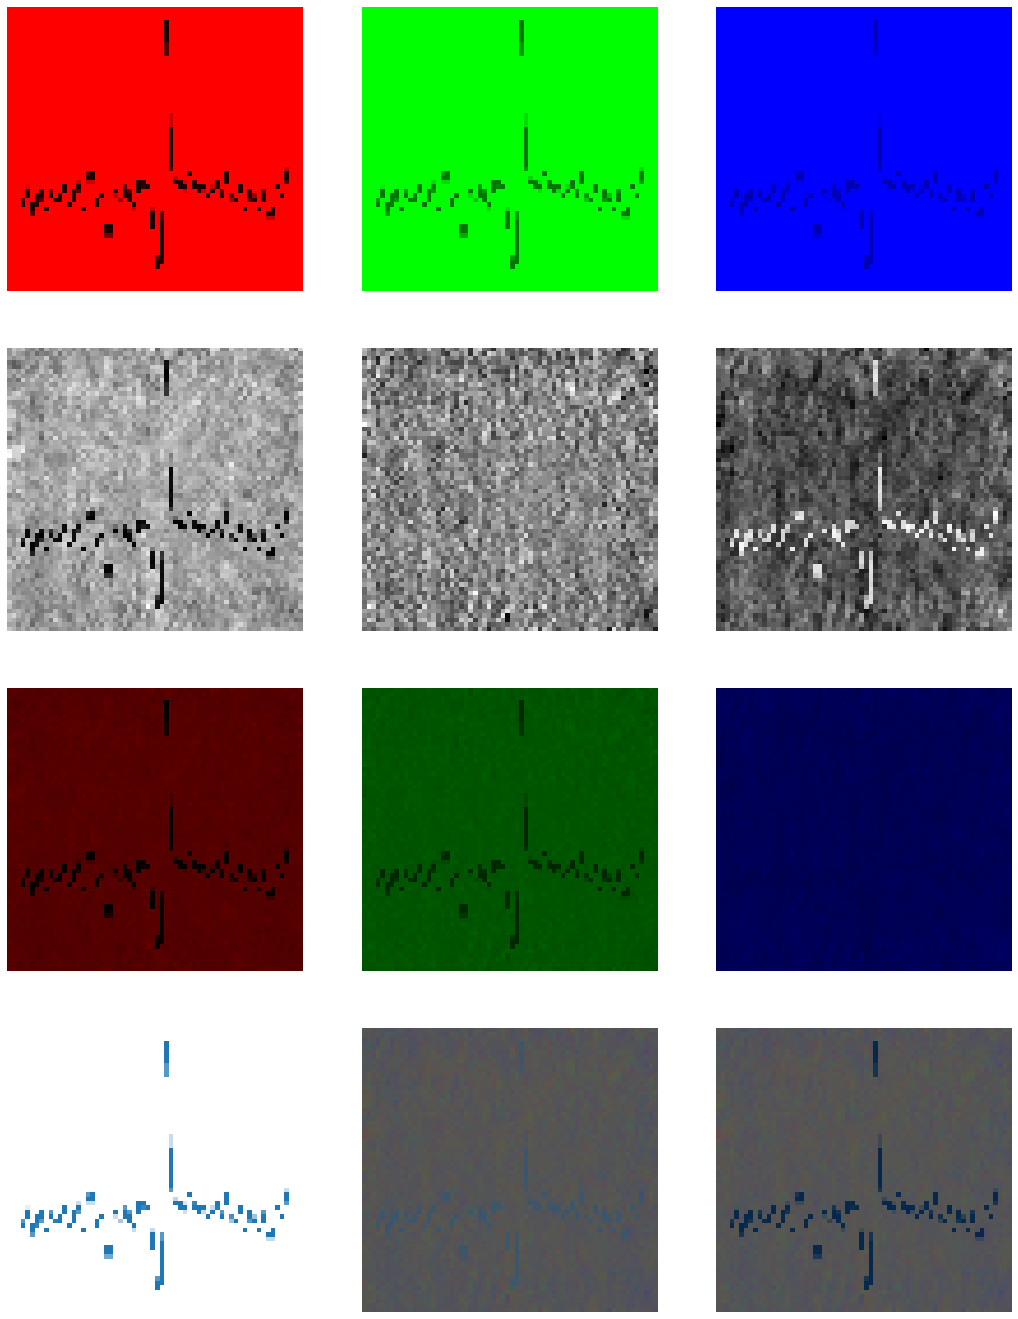

In [19]:
fig, ax = plt.subplots(ncols=3, nrows = 4, figsize=(18,24))
np.vectorize(lambda ax:ax.axis('off'))(ax)

imgr = img.numpy().reshape(64,64,3)[:,:,0]
imgr_ = np.zeros((64,64,3))
imgr_[:,:,0] = imgr
imgg = img.numpy().reshape(64,64,3)[:,:,1]
imgg_ = np.zeros((64,64,3))
imgg_[:,:,1] = imgg
imgb = img.numpy().reshape(64,64,3)[:,:,2]
imgb_ = np.zeros((64,64,3))
imgb_[:,:,2] = imgb

ax[0][0].imshow(imgr_, aspect='auto')
ax[0][1].imshow(imgg_, aspect='auto')
ax[0][2].imshow(imgb_, aspect='auto')

imgr = attended_weights.numpy().reshape(64,64,3)[:,:,0]
imgg = attended_weights.numpy().reshape(64,64,3)[:,:,1]
imgb = attended_weights.numpy().reshape(64,64,3)[:,:,2]

ax[1][0].imshow(imgr,aspect='auto', cmap=plt.get_cmap('gray'))
ax[1][1].imshow(imgg,aspect='auto', cmap=plt.get_cmap('gray'))
ax[1][2].imshow(imgb,aspect='auto', cmap=plt.get_cmap('gray'))


imgr = attended_input.numpy().reshape(64,64,3)[:,:,0]
imgr_ = np.zeros((64,64,3))
imgr_[:,:,0] = imgr
imgg = attended_input.numpy().reshape(64,64,3)[:,:,1]
imgg_ = np.zeros((64,64,3))
imgg_[:,:,1] = imgg
imgb = attended_input.numpy().reshape(64,64,3)[:,:,2]
imgb_ = np.zeros((64,64,3))
imgb_[:,:,2] = imgb

ax[2][0].imshow(imgr_,aspect='auto')
ax[2][1].imshow(imgg_,aspect='auto')
ax[2][2].imshow(imgb_,aspect='auto')

ax[3][0].imshow(img.numpy().reshape(64,64,3),aspect='auto')
ax[3][1].imshow(attended_weights.numpy().reshape(64,64,3), aspect='auto')
ax[3][2].imshow(attended_input.numpy().reshape(64,64,3), aspect='auto')

plt.show()

## first row: IMAGE 
## second row: weights
## third row: weightXimage
## fourth row column1: img, column2: weights, weightXimg

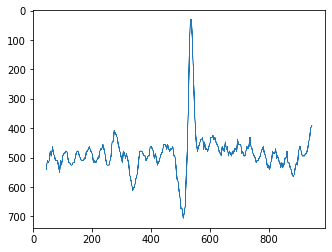

In [20]:
img = plt.imread("./data/two_class_img/N/112_87_54.0_1.png")
plt.imshow(img)